In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:08<00:00, 240MB/s]
100% 1.06G/1.06G [00:08<00:00, 138MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.utils import load_img, img_to_array,image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# generators
"""train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)"""

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
"""def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

SyntaxError: ignored

In [ ]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_ds = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
validation_ds = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_ds.flow_from_directory(
        '/content/train',  # this is the target directory
        target_size=(256, 256),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = validation_ds.flow_from_directory(
        '/content/test',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
#create CNN model

model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    start_from_epoch = 25,
    mode = 'min',

)

In [ ]:
#history = model.fit(train_ds, epochs=5, validation_data=validation_ds, verbose=True)

history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        callbacks = [callback])

<ipython-input-23-cb5f7cce7af6>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
62/62 [==============================] - 51s 567ms/step - loss: 1.3744 - accuracy: 0.5565 - val_loss: 3.5335 - val_accuracy: 0.4837
Epoch 2/50
62/62 [==============================] - 38s 614ms/step - loss: 0.8757 - accuracy: 0.5801 - val_loss: 1.0504 - val_accuracy: 0.5350
Epoch 3/50
62/62 [==============================] - 36s 580ms/step - loss: 0.7348 - accuracy: 0.6220 - val_loss: 0.7103 - val_accuracy: 0.5213
Epoch 4/50
62/62 [==============================] - 40s 648ms/step - loss: 0.6631 - accuracy: 0.6512 - val_loss: 0.9075 - val_accuracy: 0.4750
Epoch 5/50
62/62 [==============================] - 40s 644ms/step - loss: 0.6410 - accuracy: 0.6618 - val_loss: 0.6663 - val_accuracy: 0.5962
Epoch 6/50
62/62 [==============================] - 38s 612ms/step - loss: 0.6334 - accuracy: 0.6789 - val_loss: 0.7320 - val_accuracy: 0.5425
Epoch 7/50
62/62 [==============================] - 36s 576ms/step - loss: 0.6358 - accuracy: 0.6643 - val_loss: 0.6510 - val_accuracy: 0.6300

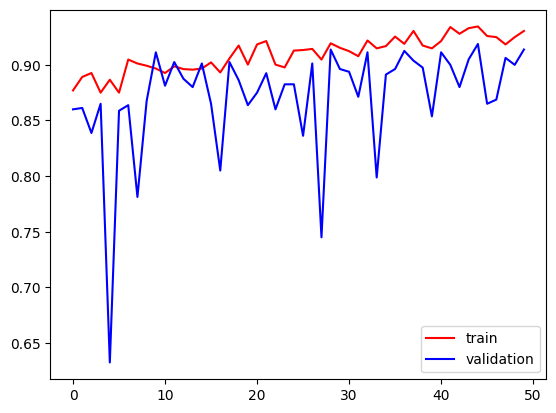

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

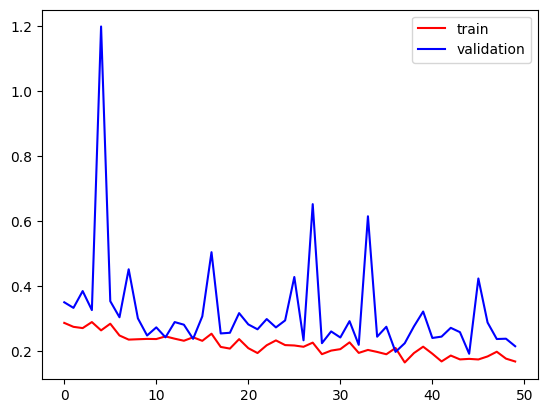

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat2.jpg')

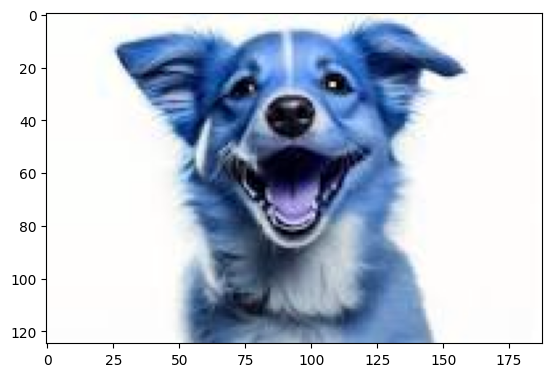

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1163, 2067, 3)

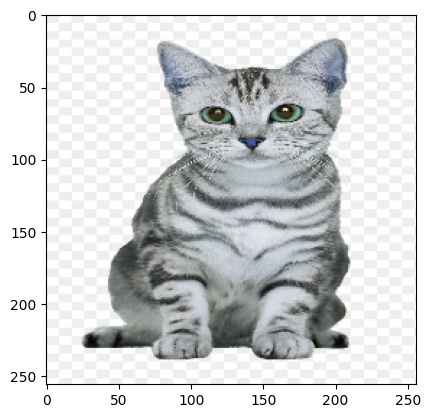

In [ ]:
test_img = cv2.resize(test_img,(256,256))
plt.imshow(test_img)

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)